In [1]:
#适应度函数
def function(x,y):
    return x**2+y**2

In [2]:
#编码
import numpy as np
def incode():
    return np.random.randint(0,2,size=6)

In [3]:
#解码
def decode(s:np.array):
    s1 = s[0:3]
    # print(s1)
    s2 = s[3:6]
    # print(s2)
    sdecode = np.array([[1],[2],[4]])
    return np.dot(s1,sdecode)[0],np.dot(s2,sdecode)[0]

In [4]:
#计算适应值，并计算适应值的总值
def funandsum(popu_value):
    popu_fun = []
    for i in popu_value:
        x,y =decode(i)
        # print(x,y)
        popu_fun.append(function(x,y))
    value_sum = sum(popu_fun)
    return (popu_fun,value_sum)

In [5]:
#初始化种群数目，N为种群数目
def population(N:int):
    popu_value = [incode() for i in range(N)]
    # print(popu_value)
    return popu_value

In [6]:
#选择，使用圆盘赌方法
#返回一个优秀个体
#popu_value是选择前的种群
def select(popu_value,popu_fun,popu_fun_sum):
    #popu_fun是待选择种群的适应度值
    # popu_fun = funandsum(popu_value)[0]
    # popu_fun_sum = sum(popu_fun)
    #popu_fun_prob是每个种群 适应度比例
    popu_fun_prob = [i/popu_fun_sum for i in popu_fun]
    #popu_fun_prob_cumu是适应度比例累计和
    popu_fun_prob_cumu = np.cumsum(popu_fun_prob)
    # print(popu_fun_prob)
    index = np.random.uniform(0,1)
    for i,prob in enumerate(popu_fun_prob_cumu):
        if index<prob: return popu_value[i]

In [7]:
#交叉
#参数为两个种群中的个体
def mate(male:np.array,female:np.array):
    child1 = np.copy(male)
    child2 = np.copy(female)
    index1,index2 = np.random.randint(0,6,2)
    if index1>index2:
        index1,index2 = index2,index1
    print(index1,index2)
    child1[index1:index2] = female[index1:index2]
    child2[index1:index2] = male[index1:index2]
    return child1,child2

In [8]:
#变异
def change(x:np.array,prob:float):
    #单点变异
    new_x = np.copy(x)
    if np.random.rand()<=prob:
        index = np.random.randint(0,6)
        if x[index] == 0:
            new_x[index]= 1
        else:
            new_x[index] = 0
    return new_x

In [9]:
def sort_index(popu_value):
    new_list = np.copy(popu_value)
    fun_list=funandsum(popu_value=new_list)[0]
    one_zip = list(zip(fun_list,new_list))
    one_zip.sort(key=lambda x:x[0], reverse=True)
    result = [x[1] for x in one_zip]
    return result

In [10]:
def main(gen=200,popu_num=40,mate_prob = 0.8,change_prob = 0.1):
    #种群中共有四十个个体
    popu_value = population(popu_num)

    for i in range(gen):
        #计算每个个体的适应值和适应值总值
        fun_list,fun_sum=funandsum(popu_value=popu_value)

        #交叉
        for k in range(len(popu_value)):
            if np.random.rand(0,1)<mate_prob:
                #取出两个较好值
                goodone = select(popu_value,fun_list,fun_sum)
                goodtwo = select(popu_value,fun_list,fun_sum)
                child1,child2 = mate(male=goodone,female=goodtwo)
                popu_value.append(child1)
                popu_value.append(child2)
        #变异
        for k in range(len(popu_value)):
            popu_value.append(change(popu_value[k],change_prob))
        #选择
        popu_value = sort_index(popu_value)[0:popu_num]
    x,y = decode(popu_value[0])
    return (x,y),function(x,y)
final_result = main(25,10,0.8,0.1)
print(final_result)

((7, 7), 98)


C:\Users\DELL\AppData\Local\Temp\ipykernel_8196\1786312133.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.random.rand(0,1)<mate_prob:


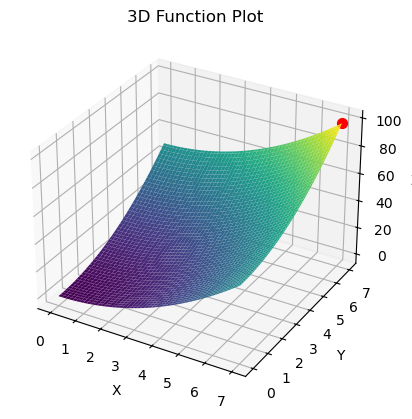

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**2 + y**2

x = np.linspace(0, 7, 100)
y = np.linspace(0, 7, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# 标记一个点
point_x = final_result[0][0]
point_y = final_result[0][1]
point_z = final_result[1]
ax.scatter(point_x, point_y, point_z, color='red', s=50)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Function Plot')

plt.show()
